In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
def read_csv(filename):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename)

    return df

# Example usage
filename = "niftybees_30day_1min.csv"
columns = ['date','open', 'high', 'low', 'close', 'volume']

# Read the CSV file with specified columns
data = read_csv(filename)
selected_data = data[columns]

print(selected_data.head())

                  date    open    high     low   close  volume
0  2024-04-04 09:15:00  249.59  250.60  248.48  249.64   49402
1  2024-04-04 09:16:00  249.64  249.90  249.64  249.88   24373
2  2024-04-04 09:17:00  249.90  249.91  249.85  249.90   16666
3  2024-04-04 09:18:00  249.85  250.00  249.80  249.95   11807
4  2024-04-04 09:19:00  249.86  249.95  249.72  249.91    8280


In [2]:
data.head()

,date,open,high,low,close,volume
0,2024-04-04 09:15:00,249.59,250.60,248.48,249.64,49402
1,2024-04-04 09:16:00,249.64,249.90,249.64,249.88,24373
2,2024-04-04 09:17:00,249.90,249.91,249.85,249.90,16666
3,2024-04-04 09:18:00,249.85,250.00,249.80,249.95,11807
4,2024-04-04 09:19:00,249.86,249.95,249.72,249.91,8280


In [7]:
data['Returns'] = data['close'].pct_change() * 100

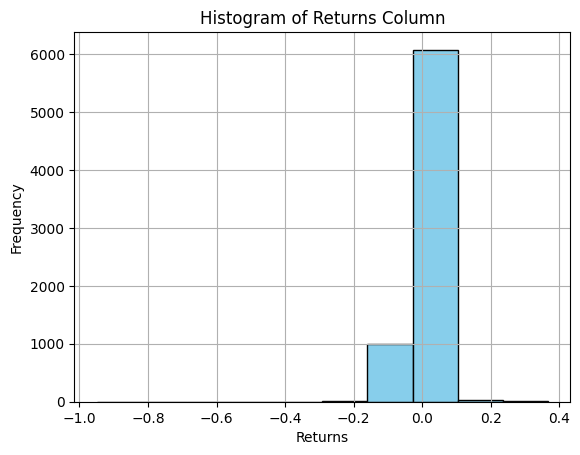

In [11]:
# Plot histogram of the "Close" column
plt.hist(data['Returns'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Returns Column')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Momentum - Both buy and sell

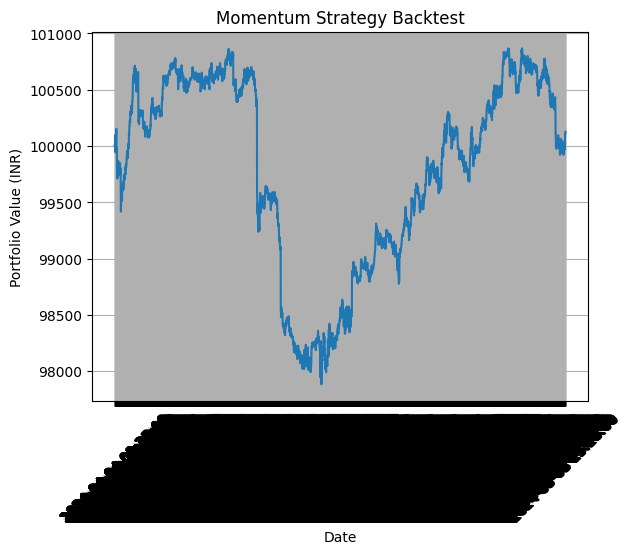

In [12]:
data['MA50'] = data['close'].rolling(window=3).mean()
data['MA200'] = data['close'].rolling(window=7).mean()

# Generate buy and sell signals based on moving average crossover
data['Signal'] = 0
data.loc[data['MA50'] > data['MA200'], 'Signal'] = 1  # Buy signal
data.loc[data['MA50'] < data['MA200'], 'Signal'] = -1  # Sell signal

# Backtest the strategy
initial_capital = 100000  # Initial capital in INR
position = 0  # 0 for no position, 1 for long position, -1 for short position
portfolio_value = [initial_capital]  # List to store portfolio value over time
shares_bought = 0

for i in range(1, len(data)):
    if data['Signal'][i] == 1 and position == 0:  # Buy signal and no position
        position = 1
        shares_bought = initial_capital / data['close'][i]
        initial_capital = 0
    
    elif data['Signal'][i] == -1 and position == 1:  # Sell signal and long position
        position = 0
        initial_capital = shares_bought * data['close'][i]
        shares_bought = 0

    elif data['Signal'][i] == -1 and position == 0:  # Sell signal and no position
        position = -1
        shares_bought = -initial_capital / data['close'][i]

    elif data['Signal'][i] == 1 and position == -1:  # Buy signal and short position
        position = 0
        initial_capital = -shares_bought*data['close'][i]
        shares_bought = 0
    
    else:  # No signal or already in position, square off existing position
        if position == 1:  # Close long position
            position = 0
            initial_capital = shares_bought * data['close'][i]
            shares_bought = 0

        if position == -1:  # Close long position
            position = 0
            initial_capital = -shares_bought * data['close'][i]
            shares_bought = 0

    p_val = initial_capital + shares_bought * data['close'][i] if shares_bought > 0  else initial_capital
    portfolio_value.append(p_val)

# Plot portfolio value over time
plt.plot(data['date'], portfolio_value)
plt.title('Momentum Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Momentum - Only buy

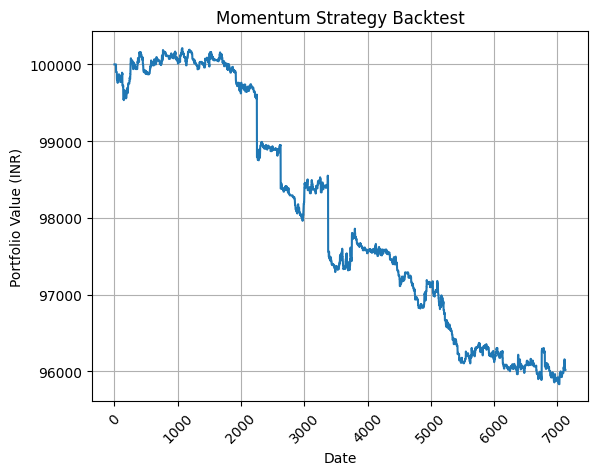

In [13]:
# data['MA50'] = data['close'].rolling(window=3).mean()
# data['MA200'] = data['close'].rolling(window=9).mean()

# # Generate buy and sell signals based on moving average crossover
# data['Signal'] = 0
# data.loc[data['MA50'] > data['MA200'], 'Signal'] = 1  # Buy signal
# data.loc[data['MA50'] < data['MA200'], 'Signal'] = -1  # Sell signal

# Backtest the strategy
initial_capital = 100000  # Initial capital in INR
position = 0  # 0 for no position, 1 for long position, -1 for short position
portfolio_value = [initial_capital]  # List to store portfolio value over time
shares_bought = 0

for i in range(0,len(data)):
    if data['Signal'][i] == 1 and position == 0:  # Buy signal and no position
        position = 1
        shares_bought = initial_capital / data['close'][i]
        initial_capital = 0
    elif data['Signal'][i] == -1 and position == 1:  # Sell signal and long position
        position = 0
        initial_capital = shares_bought * data['close'][i]
        shares_bought = 0
    else:  # No signal or already in position, square off existing position
        if position == 1:  # Close long position
            position = 0
            initial_capital = shares_bought * data['close'][i]
            shares_bought = 0

    portfolio_value.append(initial_capital + shares_bought * data['close'][i])

# Plot portfolio value over time
plt.plot(portfolio_value)
plt.title('Momentum Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [14]:
portfolio_value[-1] - portfolio_value[0]

-3983.6369554411067

## Momentum - Only Sell

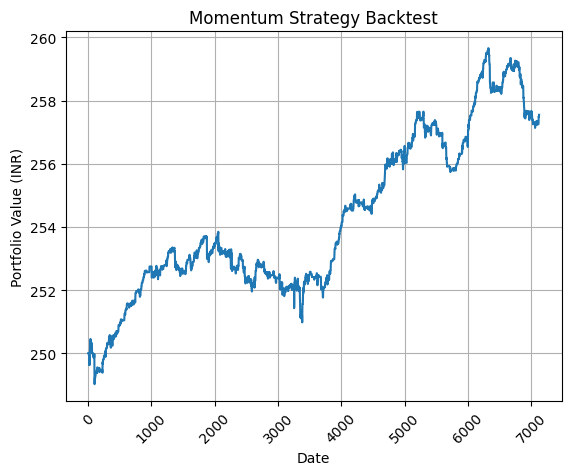

In [15]:
data['MA50'] = data['close'].rolling(window=3).mean()
data['MA200'] = data['close'].rolling(window=9).mean()

# Generate buy and sell signals based on moving average crossover
data['Signal'] = 0
data.loc[data['MA50'] > data['MA200'], 'Signal'] = 1  # Buy signal
data.loc[data['MA50'] < data['MA200'], 'Signal'] = -1  # Sell signal

# Backtest the strategy
initial_capital = 250  # Initial capital in INR
position = 0  # 0 for no position, 1 for long position, -1 for short position
portfolio_value = [initial_capital]  # List to store portfolio value over time
shares_bought = 0
profit_list = []


for i in range(0, len(data)):

    if data['Signal'][i] == -1 and position == 0:  # Buy signal and no position
        position = -1
        shares_bought = -initial_capital / data['close'][i]
    elif data['Signal'][i] == 1 and position == -1:  # Sell signal and long position
        position = 0
        initial_capital = -shares_bought * data['close'][i]
        shares_bought = 0
        profit = initial_capital - portfolio_value[-1]
        profit_list.append(profit)
    else:  # No signal or already in position, square off existing position
        if position == -1:  # Close long position
            position = 0
            initial_capital = -shares_bought * data['close'][i]
            shares_bought = 0
            profit = initial_capital - portfolio_value[-1]
            profit_list.append(profit)

    portfolio_value.append(initial_capital)

# Plot portfolio value over time
plt.plot(portfolio_value)
plt.title('Momentum Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [16]:
portfolio_value[-1] - portfolio_value[0]

7.549909295669579

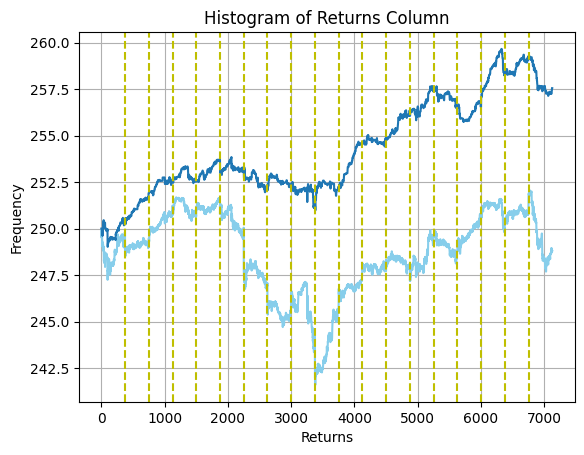

In [17]:
x = range(0, len(data))

plt.plot(data['close'], color='skyblue')
plt.plot(portfolio_value)
plt.title('Histogram of Returns Column')
plt.xlabel('Returns')
plt.ylabel('Frequency')
interval = 375
for i in range(min(x) + interval, max(x) + 1, interval):
    plt.axvline(i, color='y', linestyle='--')  # Adjust linestyle and color as needed

plt.grid(True)
plt.show()

In [18]:
portfolio_value[-1] - portfolio_value[0]

7.549909295669579

## both buy and sell

nan
-0.4283941225927901
0.04411116012350558
0.18344965104686306
0.1715129033544649
-0.2783410871207703
-0.8198360327934417
-0.5747126436781658
0.1585365853658427
-0.9490693393331973
0.3257859586251799
0.0
0.2300892100270513
-0.253929866989111
0.12430828454568221
0.040192926045024
0.2077922077922123
0.20801664133132114
0.3666945673402644


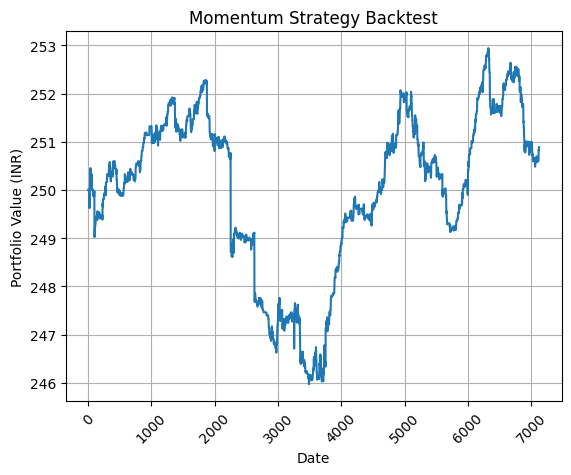

In [19]:
data['MA50'] = data['close'].rolling(window=3).mean()
data['MA200'] = data['close'].rolling(window=9).mean()

# Generate buy and sell signals based on moving average crossover
data['Signal'] = 0
data.loc[data['MA50'] > data['MA200'], 'Signal'] = 1  # Buy signal
data.loc[data['MA50'] < data['MA200'], 'Signal'] = -1  # Sell signal

# Backtest the strategy
initial_capital = 250  # Initial capital in INR
position = 0  # 0 for no position, 1 for long position, -1 for short position
portfolio_value = [initial_capital]  # List to store portfolio value over time
shares_bought = 0
profit_list = []

use_sell_list = []

use_sell = 0
day_counter = 0

for i in range(0, len(data)):
    if day_counter%375 == 0:
        print(data['Returns'][i])
        if data['Returns'][i] < 0 :
            use_sell = 0
        else:
            use_sell = 1

    day_counter +=1

    if use_sell == 1:
        if data['Signal'][i] == -1 and position == 0:  # Buy signal and no position
            position = -1
            shares_bought = -initial_capital / data['close'][i]
        elif data['Signal'][i] == 1 and position == -1:  # Sell signal and long position
            position = 0
            initial_capital = -shares_bought * data['close'][i]
            shares_bought = 0
            profit = initial_capital - portfolio_value[-1]
            profit_list.append(profit)
        else:  # No signal or already in position, square off existing position
            if position == -1:  # Close long position
                position = 0
                initial_capital = -shares_bought * data['close'][i]
                shares_bought = 0
                profit = initial_capital - portfolio_value[-1]
                profit_list.append(profit)

            if position == 1:  # Close long position
                position = 0
                initial_capital = shares_bought * data['close'][i]
                shares_bought = 0

        portfolio_value.append(initial_capital)

    if use_sell == 0:
        if data['Signal'][i] == 1 and position == 0:  # Buy signal and no position
            position = 1
            shares_bought = initial_capital / data['close'][i]
            initial_capital = 0
        elif data['Signal'][i] == -1 and position == 1:  # Sell signal and long position
            position = 0
            initial_capital = shares_bought * data['close'][i]
            shares_bought = 0
        else:  # No signal or already in position, square off existing position
            if position == 1:  # Close long position
                position = 0
                initial_capital = shares_bought * data['close'][i]
                shares_bought = 0

            if position == -1:  # Close long position
                position = 0
                initial_capital = -shares_bought * data['close'][i]
                shares_bought = 0
                profit = initial_capital - portfolio_value[-1]
                profit_list.append(profit)

        portfolio_value.append(initial_capital + shares_bought * data['close'][i])
    
    use_sell_list.append(use_sell)
        

# Plot portfolio value over time
plt.plot(portfolio_value)
# plt.plot(use_sell_list)
plt.title('Momentum Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [104]:
portfolio_value[-1] - portfolio_value[0]

0.8870727892568482

## Both buy and sell without condition

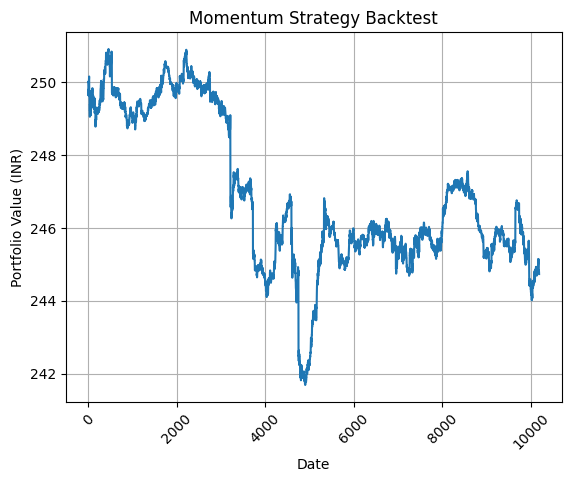

In [20]:
data['MA50'] = data['close'].rolling(window=3).mean()
data['MA200'] = data['close'].rolling(window=9).mean()

# Generate buy and sell signals based on moving average crossover
data['Signal'] = 0
data.loc[data['MA50'] > data['MA200'], 'Signal'] = 1  # Buy signal
data.loc[data['MA50'] < data['MA200'], 'Signal'] = -1  # Sell signal

# Backtest the strategy
initial_capital = 250  # Initial capital in INR
position = 0  # 0 for no position, 1 for long position, -1 for short position
portfolio_value = [initial_capital]  # List to store portfolio value over time
shares_bought = 0
profit_list = []


for i in range(0, len(data)):
    if data['Signal'][i] == -1 and position == 0:  # Buy signal and no position
        position = -1
        shares_bought = -initial_capital / data['close'][i]

        portfolio_value.append(initial_capital)

    elif data['Signal'][i] == 1 and position == -1:  # Sell signal and long position
        position = 0
        initial_capital = -shares_bought * data['close'][i]
        shares_bought = 0
        profit = initial_capital - portfolio_value[-1]
        profit_list.append(profit)

        portfolio_value.append(initial_capital)

    else:  # No signal or already in position, square off existing position
        if position == -1:  # Close long position
            position = 0
            initial_capital = -shares_bought * data['close'][i]
            shares_bought = 0
            profit = initial_capital - portfolio_value[-1]
            profit_list.append(profit)

            portfolio_value.append(initial_capital)

        if position == 1:  # Close long position
            position = 0
            initial_capital = shares_bought * data['close'][i]
            shares_bought = 0

            portfolio_value.append(initial_capital)

    

        
        if data['Signal'][i] == 1 and position == 0:  # Buy signal and no position
            position = 1
            shares_bought = initial_capital / data['close'][i]
            initial_capital = 0

            portfolio_value.append(initial_capital + shares_bought * data['close'][i])

        elif data['Signal'][i] == -1 and position == 1:  # Sell signal and long position
            position = 0
            initial_capital = shares_bought * data['close'][i]
            shares_bought = 0

            portfolio_value.append(initial_capital + shares_bought * data['close'][i])

        else:  # No signal or already in position, square off existing position
            if position == 1:  # Close long position
                position = 0
                initial_capital = shares_bought * data['close'][i]
                shares_bought = 0

                portfolio_value.append(initial_capital + shares_bought * data['close'][i])

            if position == -1:  # Close long position
                position = 0
                initial_capital = -shares_bought * data['close'][i]
                shares_bought = 0
                profit = initial_capital - portfolio_value[-1]
                profit_list.append(profit)

                portfolio_value.append(initial_capital + shares_bought * data['close'][i])
    
        

# Plot portfolio value over time
plt.plot(portfolio_value)
# plt.plot(use_sell_list)
plt.title('Momentum Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [65]:
def count_positive_negative(lst):
    positive_count = 0
    negative_count = 0

    for num in lst:
        if num > 0:
            positive_count += 1
        elif num < 0:
            negative_count += 1

    print(positive_count, negative_count)

count_positive_negative(profit_list)

846 754


In [85]:
filename = "NIFTY 50 - Minute data.csv"
columns = ['date','open', 'high', 'low', 'close', 'volume']

# Read the CSV file with specified columns
data = read_csv(filename)

In [86]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Create new columns for date and time
data['date_only'] = data['date'].dt.strftime('%Y-%m-%d')
data['time_only'] = data['date'].dt.strftime('%H:%M:%S')

In [87]:
data

,date,open,high,low,close,volume,date_only,time_only
0,2015-01-09 09:15:00,8285.45,8295.90,8285.45,8292.10,0,2015-01-09,09:15:00
1,2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,0,2015-01-09,09:16:00
2,2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,0,2015-01-09,09:17:00
3,2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,0,2015-01-09,09:18:00
4,2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,0,2015-01-09,09:19:00
...,...,...,...,...,...,...,...,...
836752,2024-01-25 15:25:00,21376.55,21378.90,21372.75,21377.95,0,2024-01-25,15:25:00
836753,2024-01-25 15:26:00,21376.55,21386.10,21375.80,21384.20,0,2024-01-25,15:26:00
836754,2024-01-25 15:27:00,21384.75,21401.75,21381.30,21394.15,0,2024-01-25,15:27:00
836755,2024-01-25 15:28:00,21392.70,21396.25,21384.25,21395.70,0,2024-01-25,15:28:00


In [96]:
grouped_data = data.groupby('date_only')

first_half_returns = []
last_half_returns = []

for date, group in grouped_data:
    if group.shape[0] == 375:
        first_half_return = (group['close'].iloc[60]/group['close'].iloc[0] - 1)*100
        last_half_return = (group['close'].iloc[374]/group['close'].iloc[315] - 1)*100

        first_half_returns.append(first_half_return)
        last_half_returns.append(last_half_return)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


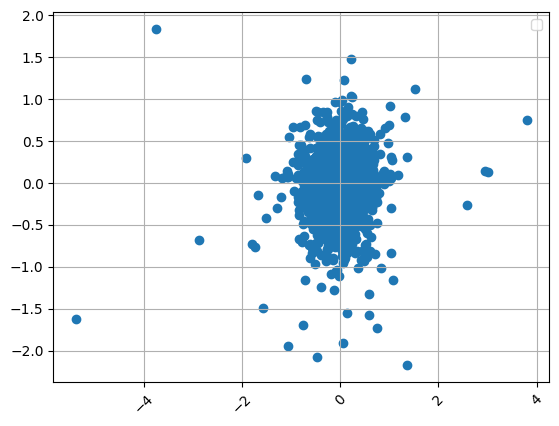

In [97]:
plt.scatter(x=pd.Series(first_half_returns), y=pd.Series(last_half_returns))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [98]:
import numpy as np
import statsmodels.api as sm

# Sample data
x = first_half_returns
y = last_half_returns

# Add a constant term to the independent variable (x)
x_with_const = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x_with_const).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     16.10
Date:                Sun, 05 May 2024   Prob (F-statistic):           6.22e-05
Time:                        11:57:30   Log-Likelihood:                -735.32
No. Observations:                2200   AIC:                             1475.
Df Residuals:                    2198   BIC:                             1486.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0123      0.007     -1.706      0.0

## Buy and Sell based on first half hour momentum

In [157]:
filename = "NIFTY 50 - Minute data.csv"
columns = ['date','open', 'high', 'low', 'close', 'volume']

# Read the CSV file with specified columns
data = read_csv(filename)

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Create new columns for date and time
data['date_only'] = data['date'].dt.strftime('%Y-%m-%d')
data['time_only'] = data['date'].dt.strftime('%H:%M:%S')

data['MA50'] = data['close'].rolling(window=3).mean()
data['MA200'] = data['close'].rolling(window=30).mean()

# Generate buy and sell signals based on moving average crossover
data['Signal'] = 0
data.loc[data['MA50'] > data['MA200'], 'Signal'] = 1  # Buy signal
data.loc[data['MA50'] < data['MA200'], 'Signal'] = -1  # Sell signal

grouped_data = data.groupby('date_only')

original_data = data

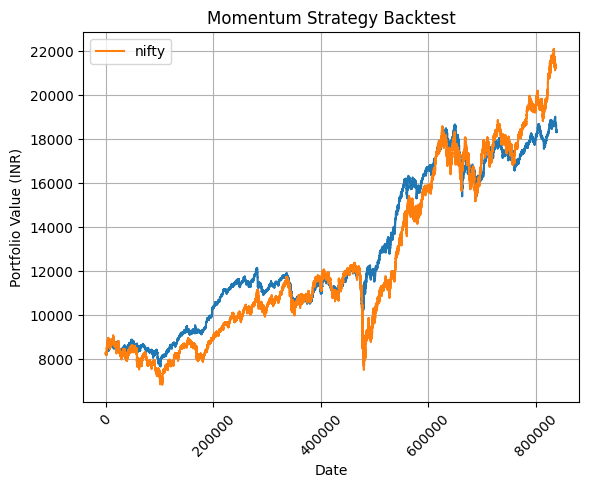

In [183]:
# Backtest the strategy
initial_capital = original_data['close'].iloc[0]  # Initial capital in INR
position = 0  # 0 for no position, 1 for long position, -1 for short position
portfolio_value = [initial_capital]  # List to store portfolio value over time
shares_bought = 0
profit_list = []

use_sell_list = []
use_sell = 0

for date, data in grouped_data:
    if data.shape[0] == 375:
        first_half_return = (data['close'].iloc[60]/data['close'].iloc[0] - 1)*100
        last_half_predicted_return = -0.0123 + 0.0732*first_half_return

        # print(last_half_predicted_return)

        if last_half_predicted_return < 0:
            use_sell = 1

        else:
            use_sell = 0
    else:
        continue

    
    for i in range(0, len(data)):

        if use_sell == 1:
            if data['Signal'].iloc[i] == -1 and position == 0:  # Buy signal and no position
                position = -1
                shares_bought = -initial_capital / data['close'].iloc[i]  

                portfolio_value.append(initial_capital) 

                if portfolio_value[-1] == 0:
                    print('in sell logic 1')
                    
            elif data['Signal'].iloc[i] == 1 and position == -1:  # Buy signal and short position
                position = 0
                initial_capital = -shares_bought * data['close'].iloc[i]
                shares_bought = 0
                profit = initial_capital - portfolio_value[-1]
                profit_list.append(profit)

                portfolio_value.append(initial_capital)

                if portfolio_value[-1] == 0:
                    print('in sell logic 2')
 

            elif data['Signal'].iloc[i] == -1 and position == 1:
                position = 0
                initial_capital = shares_bought * data['close'].iloc[i]
                shares_bought = 0

                portfolio_value.append(initial_capital)
                if portfolio_value[-1] == 0:
                    print('in sell logic 3')



            elif data['Signal'].iloc[i] == 1 and position == 1:
                portfolio_value.append(portfolio_value[-1])
                if portfolio_value[-1] == 0:
                    print('in sell logic 4')

            else:
                portfolio_value.append(initial_capital) 

            

            
            # else:  # No signal or already in position, square off existing position
            #     if position == -1:  # Close long position
            #         position = 0
            #         initial_capital = -shares_bought * data['close'].iloc[i]
            #         shares_bought = 0
            #         profit = initial_capital - portfolio_value[-1]
            #         profit_list.append(profit)

            #     if position == 1:  # Close long position
            #         position = 0
            #         initial_capital = shares_bought * data['close'].iloc[i]
            #         shares_bought = 0
                
            

        if use_sell == 0:
            if data['Signal'].iloc[i] == 1 and position == 0:  # Buy signal and no position
                position = 1
                shares_bought = initial_capital / data['close'].iloc[i]
                initial_capital = 0
                portfolio_value.append(initial_capital + shares_bought * data['close'].iloc[i])
            
            elif data['Signal'].iloc[i] == -1 and position == 1:  # Sell signal and long position
                position = 0
                initial_capital = shares_bought * data['close'].iloc[i]
                shares_bought = 0
                portfolio_value.append(initial_capital + shares_bought * data['close'].iloc[i])

            elif data['Signal'].iloc[i] == 1 and position == -1:
                position = 0
                initial_capital = -shares_bought * data['close'].iloc[i]
                shares_bought = 0
                profit = initial_capital - portfolio_value[-1]
                profit_list.append(profit)

                portfolio_value.append(initial_capital + shares_bought * data['close'].iloc[i])
            
            
            # else:  # No signal or already in position, square off existing position
            #     if position == 1:  # Close long position
            #         position = 0
            #         initial_capital = shares_bought * data['close'].iloc[i]
            #         shares_bought = 0

            #     if position == -1:  # Close long position
            #         position = 0
            #         initial_capital = -shares_bought * data['close'].iloc[i]
            #         shares_bought = 0
            #         profit = initial_capital - portfolio_value[-1]
            #         profit_list.append(profit)
            if initial_capital + shares_bought * data['close'].iloc[i] == 0:
                print('in buy logic')

            else:
                portfolio_value.append(portfolio_value[-1])
            
        
        use_sell_list.append(use_sell)
            

# Plot portfolio value over time
plt.plot(portfolio_value)
plt.plot(original_data['close'], label = 'nifty')
plt.title('Momentum Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [161]:
use_sell_list.count(0)

236625

# Backtest Buy Only 

-0.020598018596012402
0.01940808544668053
-0.0278513530981816
-0.01353440134907184
-0.03885176296963507
0.0007906930277801864
-0.007761976487876239
0.002176821949127699
-0.010892028965009666
-0.0018269494602179085
-0.008311907436531204
-0.01143393279697118
-0.05758557825629321
-0.0264026034473947
-0.034146786387808346
-0.04812252621875212
0.030399859908596234
-0.022805890187613777
-0.026376430894024697
0.08455645549318196
-0.0033653879686130275
-0.04875086365391646
0.005293233723798861
0.014267089811678386
0.013933732357227576
-0.008058383824745774
-0.04517887742523759
-0.016269586388439866
-0.0029280971895965235
-0.002400688683318823
-0.030501685848228627
-0.021546016323359084
-0.020594291868605355
-0.009357779266453616
0.006248023515329345
-0.03291802009553594
-0.015497562737663376
-0.04421866474625159
-0.015105785029404859
-0.0009762616308390155
-0.005858289570679944
0.019865910295101867
-0.023375526415332457
0.02264773479271375
-0.01055561322646518
-0.03060446969608894
0.0128333044

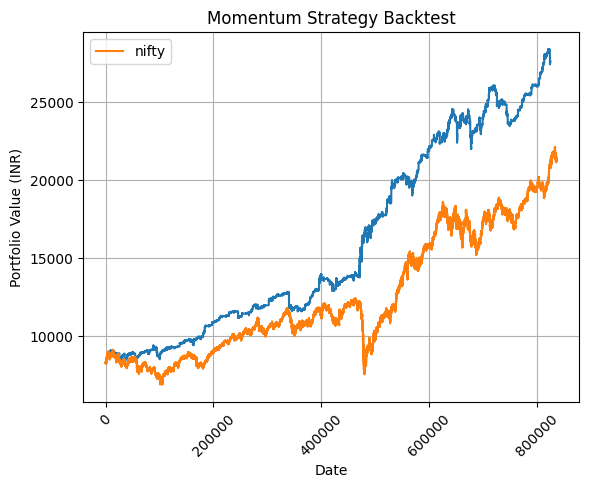

In [179]:
# Backtest the strategy
initial_capital = original_data['close'].iloc[0]    # Initial capital in INR
position = 0  # 0 for no position, 1 for long position, -1 for short position
portfolio_value = [initial_capital]  # List to store portfolio value over time
shares_bought = 0
profit_list = []

use_sell_list = []
use_sell = 0

for date, data in grouped_data:
    if data.shape[0] == 375:
        first_half_return = (data['close'].iloc[60]/data['close'].iloc[0] - 1)*100
        last_half_predicted_return = -0.0123 + 0.0732*first_half_return

        print(last_half_predicted_return)

        if last_half_predicted_return < 0:
            use_sell = 1

        else:
            use_sell = 0
    else:
        continue

    for i in range(0, len(data)):

        # if use_sell == 1:
        #     if data['Signal'].iloc[i] == -1 and position == 0:  # Buy signal and no position
        #         position = -1
        #         shares_bought = -initial_capital / data['close'].iloc[i]
        #     elif data['Signal'].iloc[i] == 1 and position == -1:  # Sell signal and long position
        #         position = 0
        #         initial_capital = -shares_bought * data['close'].iloc[i]
        #         shares_bought = 0
        #         profit = initial_capital - portfolio_value[-1]
        #         profit_list.append(profit)
        #     else:  # No signal or already in position, square off existing position
        #         if position == -1:  # Close long position
        #             position = 0
        #             initial_capital = -shares_bought * data['close'].iloc[i]
        #             shares_bought = 0
        #             profit = initial_capital - portfolio_value[-1]
        #             profit_list.append(profit)

        #         if position == 1:  # Close long position
        #             position = 0
        #             initial_capital = shares_bought * data['close'].iloc[i]
        #             shares_bought = 0

        #     portfolio_value.append(initial_capital)

        if use_sell == 0:
            if data['Signal'].iloc[i] == 1 and position == 0:  # Buy signal and no position
                position = 1
                shares_bought = initial_capital / data['close'].iloc[i]
                initial_capital = 0
            elif data['Signal'].iloc[i] == -1 and position == 1:  # Sell signal and long position
                position = 0
                initial_capital = shares_bought * data['close'].iloc[i]
                shares_bought = 0
            # else:  # No signal or already in position, square off existing position
            #     if position == 1:  # Close long position
            #         position = 0
            #         initial_capital = shares_bought * data['close'].iloc[i]
            #         shares_bought = 0

            #     if position == -1:  # Close long position
            #         position = 0
            #         initial_capital = -shares_bought * data['close'].iloc[i]
            #         shares_bought = 0
            #         profit = initial_capital - portfolio_value[-1]
            #         profit_list.append(profit)

            portfolio_value.append(initial_capital + shares_bought * data['close'].iloc[i])

        else:
            portfolio_value.append(portfolio_value[-1])
        
        use_sell_list.append(use_sell)
            

# Plot portfolio value over time
plt.plot(portfolio_value)
plt.plot(original_data['close'], label = 'nifty')
plt.title('Momentum Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

## Mometum Backtest Buy only without condition

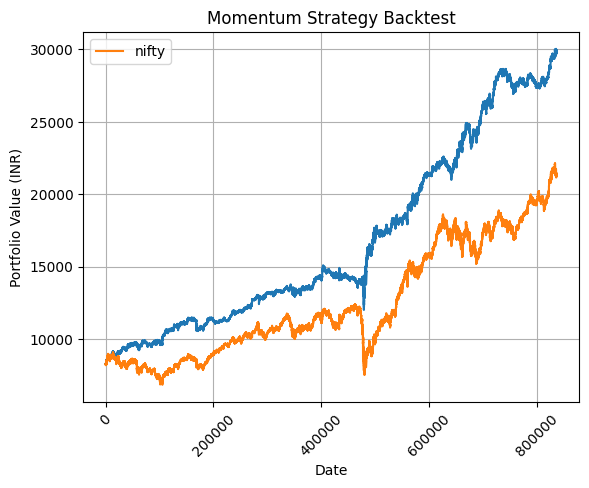

In [186]:
# Backtest the strategy
initial_capital = original_data['close'].iloc[0]    # Initial capital in INR
position = 0  # 0 for no position, 1 for long position, -1 for short position
portfolio_value = [initial_capital]  # List to store portfolio value over time
shares_bought = 0
profit_list = []

use_sell_list = []
use_sell = 0

for date, data in grouped_data:
    # if data.shape[0] == 375:
    #     first_half_return = (data['close'].iloc[60]/data['close'].iloc[0] - 1)*100
    #     last_half_predicted_return = -0.0123 + 0.0732*first_half_return

    #     print(last_half_predicted_return)

    #     if last_half_predicted_return < 0:
    #         use_sell = 1

    #     else:
    #         use_sell = 0
    # else:
    #     continue

    for i in range(0, len(data)):

        # if use_sell == 1:
        #     if data['Signal'].iloc[i] == -1 and position == 0:  # Buy signal and no position
        #         position = -1
        #         shares_bought = -initial_capital / data['close'].iloc[i]
        #     elif data['Signal'].iloc[i] == 1 and position == -1:  # Sell signal and long position
        #         position = 0
        #         initial_capital = -shares_bought * data['close'].iloc[i]
        #         shares_bought = 0
        #         profit = initial_capital - portfolio_value[-1]
        #         profit_list.append(profit)
        #     else:  # No signal or already in position, square off existing position
        #         if position == -1:  # Close long position
        #             position = 0
        #             initial_capital = -shares_bought * data['close'].iloc[i]
        #             shares_bought = 0
        #             profit = initial_capital - portfolio_value[-1]
        #             profit_list.append(profit)

        #         if position == 1:  # Close long position
        #             position = 0
        #             initial_capital = shares_bought * data['close'].iloc[i]
        #             shares_bought = 0

        #     portfolio_value.append(initial_capital)

        if use_sell == 0:
            if data['Signal'].iloc[i] == 1 and position == 0:  # Buy signal and no position
                position = 1
                shares_bought = initial_capital / data['close'].iloc[i]
                initial_capital = 0
            elif data['Signal'].iloc[i] == -1 and position == 1:  # Sell signal and long position
                position = 0
                initial_capital = shares_bought * data['close'].iloc[i]
                shares_bought = 0
            # else:  # No signal or already in position, square off existing position
            #     if position == 1:  # Close long position
            #         position = 0
            #         initial_capital = shares_bought * data['close'].iloc[i]
            #         shares_bought = 0

            #     if position == -1:  # Close long position
            #         position = 0
            #         initial_capital = -shares_bought * data['close'].iloc[i]
            #         shares_bought = 0
            #         profit = initial_capital - portfolio_value[-1]
            #         profit_list.append(profit)

            portfolio_value.append(initial_capital + shares_bought * data['close'].iloc[i])

        else:
            portfolio_value.append(portfolio_value[-1])
        
        use_sell_list.append(use_sell)
            

# Plot portfolio value over time
plt.plot(portfolio_value)
plt.plot(original_data['close'], label = 'nifty')
plt.title('Momentum Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Momentum Strategy Backtest Sell Only

-0.020598018596012402
0.01940808544668053
-0.0278513530981816
-0.01353440134907184
-0.03885176296963507
0.0007906930277801864
-0.007761976487876239
0.002176821949127699
-0.010892028965009666
-0.0018269494602179085
-0.008311907436531204
-0.01143393279697118
-0.05758557825629321
-0.0264026034473947
-0.034146786387808346
-0.04812252621875212
0.030399859908596234
-0.022805890187613777
-0.026376430894024697
0.08455645549318196
-0.0033653879686130275
-0.04875086365391646
0.005293233723798861
0.014267089811678386
0.013933732357227576
-0.008058383824745774
-0.04517887742523759
-0.016269586388439866
-0.0029280971895965235
-0.002400688683318823
-0.030501685848228627
-0.021546016323359084
-0.020594291868605355
-0.009357779266453616
0.006248023515329345
-0.03291802009553594
-0.015497562737663376
-0.04421866474625159
-0.015105785029404859
-0.0009762616308390155
-0.005858289570679944
0.019865910295101867
-0.023375526415332457
0.02264773479271375
-0.01055561322646518
-0.03060446969608894
0.0128333044

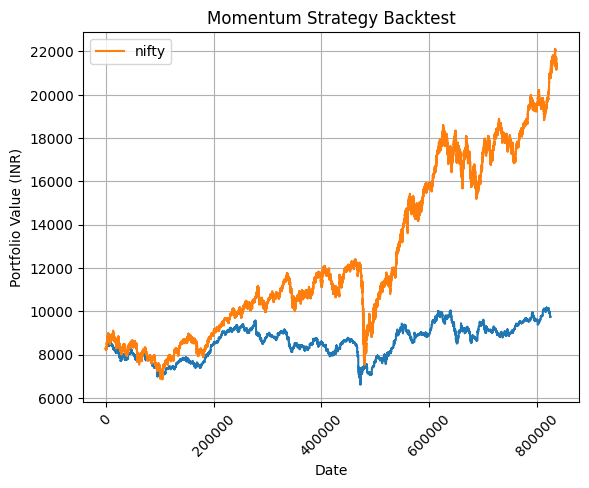

In [182]:
# Backtest the strategy
initial_capital = original_data['close'].iloc[0]  # Initial capital in INR
position = 0  # 0 for no position, 1 for long position, -1 for short position
portfolio_value = [initial_capital]  # List to store portfolio value over time
shares_bought = 0
profit_list = []

use_sell_list = []
use_sell = 0

for date, data in grouped_data:
    if data.shape[0] == 375:
        first_half_return = (data['close'].iloc[60]/data['close'].iloc[0] - 1)*100
        last_half_predicted_return = -0.0123 + 0.0732*first_half_return

        print(last_half_predicted_return)

        if last_half_predicted_return < 0:
            use_sell = 1

        else:
            use_sell = 0
    else:
        continue

    for i in range(0, len(data)):

        if use_sell == 1:
            if data['Signal'].iloc[i] == -1 and position == 0:  # Buy signal and no position
                position = -1
                shares_bought = -initial_capital / data['close'].iloc[i]
            elif data['Signal'].iloc[i] == 1 and position == -1:  # Sell signal and long position
                position = 0
                initial_capital = -shares_bought * data['close'].iloc[i]
                shares_bought = 0
                profit = initial_capital - portfolio_value[-1]
                profit_list.append(profit)
            # elif data['Signal'].iloc[i] == 0 and position == -1:  # No signal or already in position, square off existing position
            #     position = 0
            #     initial_capital = -shares_bought * data['close'].iloc[i]
            #     shares_bought = 0
            #     profit = initial_capital - portfolio_value[-1]
            #     profit_list.append(profit)

            portfolio_value.append(initial_capital)

        # if use_sell == 0:
        #     if data['Signal'].iloc[i] == 1 and position == 0:  # Buy signal and no position
        #         position = 1
        #         shares_bought = initial_capital / data['close'].iloc[i]
        #         initial_capital = 0
        #     elif data['Signal'].iloc[i] == -1 and position == 1:  # Sell signal and long position
        #         position = 0
        #         initial_capital = shares_bought * data['close'].iloc[i]
        #         shares_bought = 0
        #     else:  # No signal or already in position, square off existing position
        #         if position == 1:  # Close long position
        #             position = 0
        #             initial_capital = shares_bought * data['close'].iloc[i]
        #             shares_bought = 0

        #         if position == -1:  # Close long position
        #             position = 0
        #             initial_capital = -shares_bought * data['close'].iloc[i]
        #             shares_bought = 0
        #             profit = initial_capital - portfolio_value[-1]
        #             profit_list.append(profit)

        #     portfolio_value.append(initial_capital + shares_bought * data['close'].iloc[i])

        else:
            portfolio_value.append(portfolio_value[-1])
        
        use_sell_list.append(use_sell)
            

# Plot portfolio value over time
plt.plot(portfolio_value)
plt.plot(original_data['close'], label = 'nifty')
plt.plot()
plt.title('Momentum Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [172]:
original_data[original_data['Signal']==1].count()

date         437284
open         437284
high         437284
low          437284
close        437284
volume       437284
date_only    437284
time_only    437284
MA50         437284
MA200        437284
Signal       437284
dtype: int64